# Tri-State Glory

In this notebook, we set the data up to be useable in our models. The Zillow data came in wide format, but we need to see it in long format to pass it through the ARIMA model. In this notebook, we melt our data into the necessary format. From there we perform some preliminary EDA on our data.

Before we start, we first import the necessary libraries.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as mno

import warnings
warnings.simplefilter('ignore') 

In [113]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Functions

In [114]:
# provided function

def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName','SizeRank', 'AveragePrice','ROI'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    #return melted.groupby('time').aggregate({'value':'mean'})
    return melted

In [115]:
# provided function

def melt_data_state(df):
    melted = pd.melt(df, id_vars=['RegionID', 'Zipcode','SizeRank', 'AveragePrice','ROI'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    #return melted.groupby('time').aggregate({'value':'mean'})
    return melted

## Read in Data

We want to read in our filtered data for the 9 zip codes we'll analyze later.

In [116]:
df = pd.read_csv('zipcode_data.csv', index_col=0)
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,AveragePrice
57,60545,7030,Hoboken,NJ,New York,Hudson,58,301600.00,302700.00,303800.00,304800.00,305800.00,306800.00,308100.00,309400.00,311400.00,314000.00,316400.00,318400.00,320600.00,322900.00,325300.00,327700.00,330300.00,332900.00,335800.00,339000.00,342900.00,347400.00,351800.00,355900.00,360200.00,364700.00,369200.00,373800.00,378400.00,383100.00,388100.00,393300.00,399300.00,405600.00,411800.00,417600.00,423600.00,429400.00,435000.00,440500.00,445800.00,451000.00,456500.00,462100.00,468500.00,475300.00,482100.00,488500.00,495000.00,501400.00,507800.00,514200.00,520400.00,526800.00,533400.00,540400.00,548000.00,556000.00,564000.00,572000.00,580000.00,587800.00,595400.00,602600.00,609500.00,616500.00,623600.00,631000.00,638800.00,646900.00,655100.00,663300.00,671200.00,678700.00,685600.00,692000.00,698100.00,704000.00,710400.00,716800.00,722800.00,728400.00,734000.00,739600.00,744900.00,749800.00,754200.00,758400.00,762800.00,767900.00,773700.00,779600.00,785400.00,791000.00,796500.00,802600.00,809700.00,818300.00,828900.00,841300.00,854100.00,866400.00,878200.00,890300.00,903600.00,916900.00,928700.00,938900.00,948700.00,958900.00,971500.00,987700.00,1007300.00,1028300.00,1047800.00,1064300.00,1078200.00,1090000.00,1101100.00,1113100.00,1125900.00,1137400.00,1146100.00,1150900.00,1152800.00,1153600.00,1154500.00,1156700.00,1162000.00,1168700.00,1175800.00,1184400.00,1194500.00,1203800.00,1211800.00,1218300.00,1223300.00,1226700.00,1227900.00,1226700.00,1224300.00,1219300.00,1211600.00,1204200.00,1197800.00,1190100.00,1181200.00,1170100.00,1157500.00,1145600.00,1134900.00,1124300.00,1114600.00,1103700.00,1091700.00,1080500.00,1069100.00,1054500.00,1040700.00,1032600.00,1030800.00,1032400.00,1034000.00,1034300.00,1028300.00,1022000.00,1022400.00,1025800.00,1021300.00,1015000.00,101090

## State Distributions

Before we proceed, we want to take a look at the overall state distribution. The best way to do that is to group by the state and save off a new data frame for each one. From there we can melt the date ranges down and graph the distribtion.

In [117]:
# group by state to see the average value for the 3 zip codes in each state

states = df.groupby('State').mean()
states.head()

NY = states.loc[["NY"]]
NJ = states.loc[["NJ"]]
CT = states.loc[["CT"]]

In [119]:
# melt data to long form

NY = melt_data_state(NY)
NJ = melt_data_state(NJ)
CT = melt_data_state(CT)

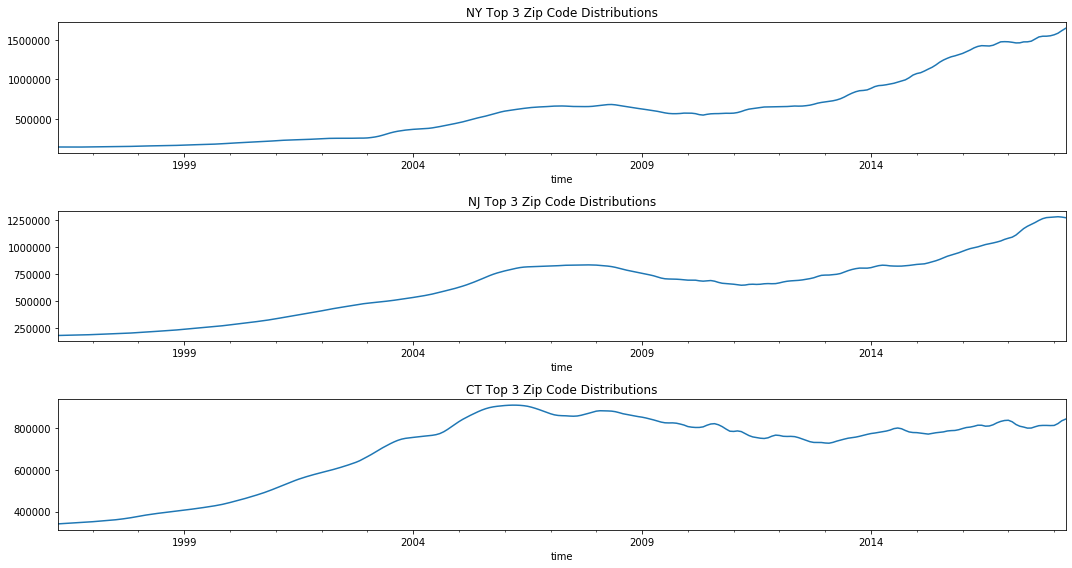

In [120]:
# graphing the average value for the top 3 zip codes

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15,8))
# Use ax1 to plot NY
NY.plot(x='time', y='value', legend=False, ax=ax1)
ax1.set_title("NY Top 3 Zip Code Distributions")
print("")
print("")
# Use ax2 to plot NJ
NJ.plot(x='time', y='value', legend=False, ax=ax2)
ax2.set_title("NJ Top 3 Zip Code Distributions")
print("")
print("")
# Use ax2 to plot CT
CT.plot(x='time', y='value', legend=False, ax=ax3)
ax3.set_title("CT Top 3 Zip Code Distributions")
plt.savefig('state_distribution')
plt.tight_layout()

## Melting the DataFrame for Modeling

Now that we have those graphs, we can melt the dataframe we're going to ultimately use for modeling and start some EDA. There is more EDA on the individual zip codes in subsequent notebooks, but this gives us a first look.

In [121]:
melted = melt_data(df)
melted.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,AveragePrice,ROI,time,value
0,60545,7030,Hoboken,NJ,New York,Hudson,58,957777.36,5.15,1996-04-01,301600.00
1,62022,11211,New York,NY,New York,Kings,118,595167.17,11.19,1996-04-01,133200.00
2,60639,7302,Jersey City,NJ,New York,Hudson,192,596591.32,9.40,1996-04-01,137200.00
3,62027,11216,New York,NY,New York,Kings,476,572171.70,9.94,1996-04-01,146100.00
4,62033,11222,New York,NY,New York,Kings,1156,640047.55,10.54,1996-04-01,149200.00


In [122]:
# check for nulls values

melted.isnull().sum()

RegionID        0
Zipcode         0
City            0
State           0
Metro           0
CountyName      0
SizeRank        0
AveragePrice    0
ROI             0
time            0
value           0
dtype: int64

In [123]:
# drop unnecessary columns

melted.drop(columns=['RegionID', 'Metro', 'CountyName', 'SizeRank', 'AveragePrice', 'ROI'], inplace=True)

Before we proceed, we wanted to look at the overall data distribution. Below is a graph of the average for the 9 zip codes across all states. This is for our reference, but we really work with the individual zip codes from here on out.

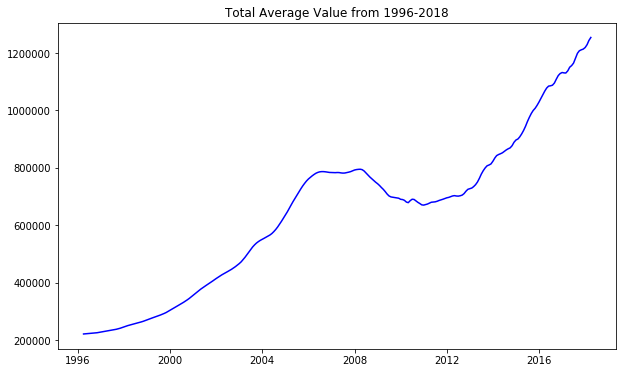

In [65]:
total = melted.groupby('time').mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(total['value'], color='blue',label='Temp')
plt.title('Total Average Value from 1996-2018')
plt.savefig('Total Average Value from 1996-2018')
plt.show()

## EDA

The first thing we want to do from here is to turn the 'time' column to a datetime and set it as our index. This way we'll be able to plot the series and slice when necessary.

In [124]:
melted['time'] = pd.to_datetime(melted['time'])
melted.set_index('time', inplace=True)
melted.head()

,Zipcode,City,State,value
time,,,,
1996-04-01,7030,Hoboken,NJ,301600.00
1996-04-01,11211,New York,NY,133200.00
1996-04-01,7302,Jersey City,NJ,137200.00
1996-04-01,11216,New York,NY,146100.00
1996-04-01,11222,New York,NY,149200.00


Our new dataframe is much smaller. We'll eventually drop the 'City' and 'State' columns, but for now they're helpful to understand the context of our data. Before moving on to modeling, it's helpful to see the descriptive statistics for each zip code. We create a for loop and add an individual dataframe for each zip code. We've printed the first one in the list.

In [125]:
melted.shape

(2385, 4)

In [128]:
dfs_ts = []
for zc in melted.Zipcode.unique():
    #Create separate dataframes for each zipcode with a monthly frequency.
    df = melted[melted['Zipcode']==zc].asfreq('MS')
    dfs_ts.append(df)

print('Hoboken DataFrame: ')
    
dfs_ts[0].head()

Hoboken DataFrame: 


,Zipcode,City,State,value
time,,,,
1996-04-01,7030,Hoboken,NJ,301600.00
1996-05-01,7030,Hoboken,NJ,302700.00
1996-06-01,7030,Hoboken,NJ,303800.00
1996-07-01,7030,Hoboken,NJ,304800.00
1996-08-01,7030,Hoboken,NJ,305800.00


In [129]:
# print desciptive statistics

for i in range(len(dfs_ts)):
    print(f'Value descriptive statistics for zipcode {dfs_ts[i].Zipcode[0]}:')
    print(f'{dfs_ts[i].value.describe()}\n')

Value descriptive statistics for zipcode 7030:
count       265.00
mean     957777.36
std      405561.19
min      301600.00
25%      623600.00
50%     1005600.00
75%     1211600.00
max     1857600.00
Name: value, dtype: float64

Value descriptive statistics for zipcode 11211:
count       265.00
mean     595167.17
std      395073.12
min      131500.00
25%      223500.00
50%      609000.00
75%      712600.00
max     1623700.00
Name: value, dtype: float64

Value descriptive statistics for zipcode 7302:
count       265.00
mean     596591.32
std      317338.24
min      137200.00
25%      325900.00
50%      643200.00
75%      771300.00
max     1454900.00
Name: value, dtype: float64

Value descriptive statistics for zipcode 11216:
count       265.00
mean     572171.70
std      384863.36
min      146100.00
25%      246400.00
50%      507200.00
75%      681600.00
max     1598700.00
Name: value, dtype: float64

Value descriptive statistics for zipcode 11222:
count       265.00
mean     640047.55


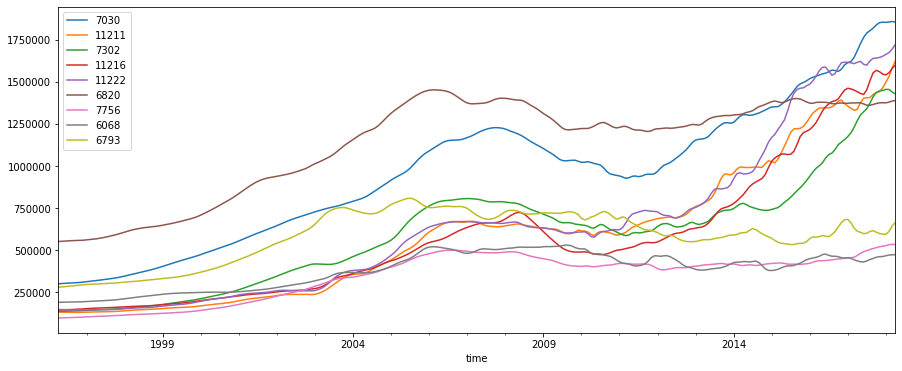

In [131]:
# visualize the distributions for the individual zip codes

for i in range(9):
    dfs_ts[i].value.plot(label=dfs_ts[i].Zipcode[0],figsize=(15,6)).get_figure().savefig('zip_distros.png',dpi=None,bbox_inches = 'tight')
    plt.legend()

Finally we save down a new (another new!) csv file to work off of. To make our notebooks more readable, we split them up by state to test for stationariy and fit different models before ultimately choosing our best model. Based on the graph above, we'll likely have to do some differencing to satistify the stationarity requirement.

In [132]:
melted.to_csv('topzip_timeseries.csv')